In [81]:
from IPython.display import Image

<a name='toc'></a>  

##  Lab Three : Clustering

             
* <a href='#ref.01'> References</a> :
            
#toc

***

### Cluster Analysis   

 * #### Train     (1):  
     - Perform cluster analysis using several clustering methods (adjust parameters).  
 * #### Eval      (2):  
     - Use internal and/or external validation measures to describe and compare the clusterings and the clusters
     - How did you determine a suitable number of clusters for each method ?   
 * #### Visualize (3):
     - Use tables/visualization to discuss the found results.  
     - Explain each visualization in detail.  
 * #### Summarize (4):  
     - Describe your results.  
     - What findings are the most interesting and why ?  
     
***

<a name='me.01.t1'></a>

<font color = "#0B243B" size = 4>  Modeling and Evaluation 1

### Modeling and Evaluation 1 (Train)

The base data set from which we are starting has appoximately 35 features. The data set was cleaned and pre-processed for analysis, as outlined in the prior sections of this report - missing values identified, outliers dispositioned, and also all features re-scaled to standard normal distribution.  

In the nominal data set some features are naturally scaled from 0 to 1 (real values), such as the Latent Dirichlet Allocation (LDA) measures, while other features are measured in the range of 0 - 800,000 ! (e.g. number of shares in social media context). Since both dimensionality reduction and cluster analyses depend on relative magnitudes, all features were mapped to standard normal distribution to provide even weighting of all features in the mapping / clustering processes. The binary features (e.g., is_data_channel_technology) are all retained as binary 0/1 valued features and one-hot encoded to similarly support evenly distributed distance evaluations among such categorical features.  

Early efforts in which we attempted to use the cleaned data set and perform cluster analyses yielded results which did not provide straightforward interpretations of the clustering results. Visually, the cluster maps did not provide well-organized presentations of clusters and the silhouette and distortion metrics were generally disorganzied as a function of the number of clusters - these metrics were not smooth functions that indicated in any clear sense an optimal or even preferred number of clusters from those analyses. Methods attempted at that point included k-means, DBSCAN, and Spectral Clustering.

* #### t-Distributed Stochastic Neighbor Embedding  

Thus, we were motivated to explore dimensionality reduction as a means to simplify the data set that we presented to the clustering algorithms. Evaluating choices for dimensionality reduction we considered Principal Components Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE). Between the two methods, we decided to evaluate t-SNE.  
 - PCA linear dimensionality reduction algorithms is that they concentrate on placing dissimilar data points far apart in a lower dimension representation. But in order to represent high dimension data on low dimension, non-linear manifold, it is important that similar datapoints must be represented close together, which is not what linear dimensionality reduction algorithms do. <sup><a href="#fn1" id="ref1">1</a></sup>  
 - t-SNE is a recently developed method (2008)<sup><a href="#fn2" id="ref2">2</a></sup> that provides a means of dimensional reduction and is becomg popular as a visualization tool for high dimensional data.  
     - The method is a probablistic method of mapping distance distributions from the high dimensional space to a lower dimensional space. In contrast to PCA, the t-SNE approach can provide differing results on successive solutions on the same data set.  
     - It is somewhat computationally expensive, and so the proceesing time can be prohibitive on large data sets. For our case, we chose to use 35% of the ~40,000 rows and 35 features. The processing time for a 2-dimensional mapping varied from 200 seconds (perplexity = 5) to 46 minutes (perplexity = 1000). This time duration was supportable and provides a good compromise of sampling 1/3 of the data set. The 35% sample from the full data set was selected as a random sample. The distributions of the features in the sampled set were similar to the distributions in the nominal full data set. This data set does not have features that are heavily biased, so random sampling within this data produces samples with similar dIStributions. 
     - multiple runs of the t-SNE algorithm with different samples produced t-SNE maps with visual similarities, and produced very consistent measures of KL-divergence from run to run. Thus, sampling within the set does not appreciably influence the produced mapped data.
     - the controlling parameter in the sci-kit learn implementation of t-SNE is the _perplexity_ parameter. _Perplexity_ in t-SNE is the parameter that functions to set the number of nearest neighbors in the mapped space. The authors of the method suggest that perplexity values in the range of 5 to 50 are typically used. For our evaluation, we experimented with _perplexity_ in the range of 5 to 1000. Kullback-Leibler divergence is the provided output measure in the sci-kit learn model and is recommended as a means to monitor the relative improvment of one t-SNE mapping in comparison with others as a function of the perplexity. The K-L divergence acts in this case as a measure of the cross-entropy between the provided feature set and the t-SNE mapped distribution. In our analysis, the K-L divergence continued to decrease with increasing perplexity without achieving a demonstrated minimum, although the curve of K-L divergence plotted vs. perplexity does exhibit an elbow with perplexity in the 200 - 400 range. In addition, the plot of processing time vs. perplexity shows an essentially linear relationship; thus increasing perplexity comes with a consequent cost to process time. Visually, the t-SNE mappings in 2-D space appear to generate visually separable clusters and approximately the same number of visual clusters. We estimate that using perplexity in the range of 75 - 400 for this data set provides reasonably consistent results for the purposes of this evaluation.  
     - in any case, once computed, the t-SNE maps for all values of perplexity were saved and are available for use in the subsequent clustering applications  
     - since the original data set was sampled at 35% of the full data set, the indices of the sampled rows were retained and written back to the saved data set of t-SNE vectors, so that the identical rows could be matched from the full data set during the later evaluation to be completed after the clustering analyses  
     
  

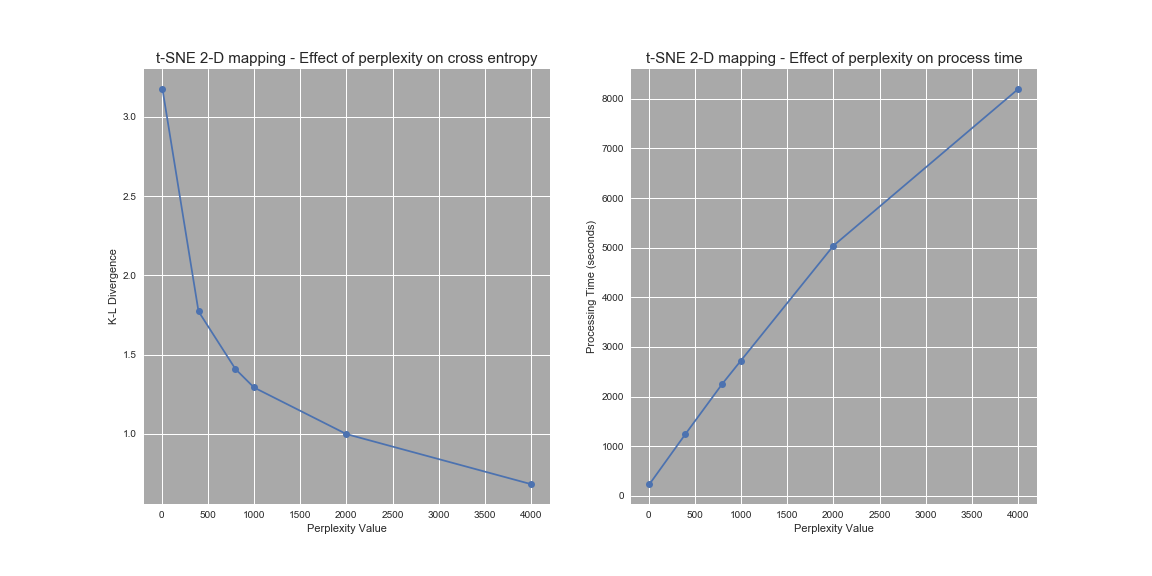

In [82]:
Image("../cluster/t_sne_divergence_process_time.png")

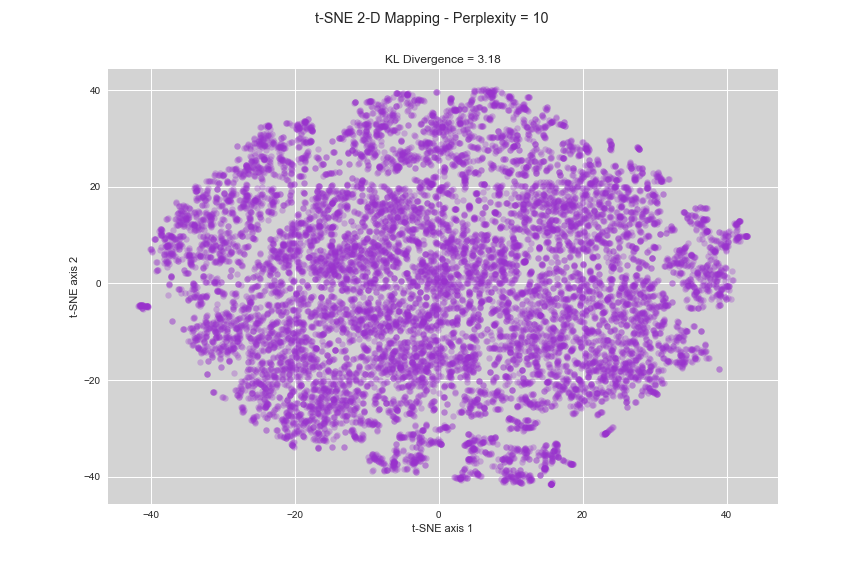

In [83]:
Image("../cluster/t-sne_perplx_plots/perplex_0010.png")

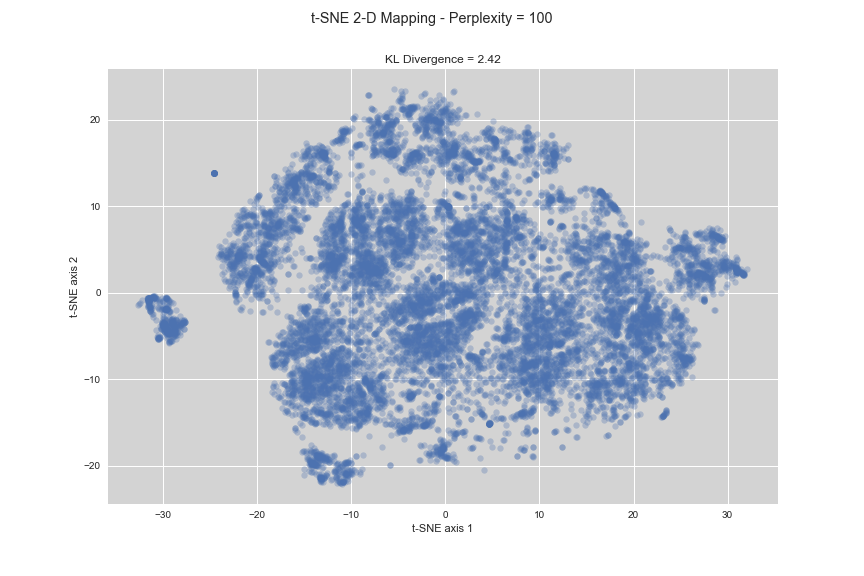

In [84]:
Image("../cluster/t-sne_perplx_plots/perplex_0100.png", retina = True)

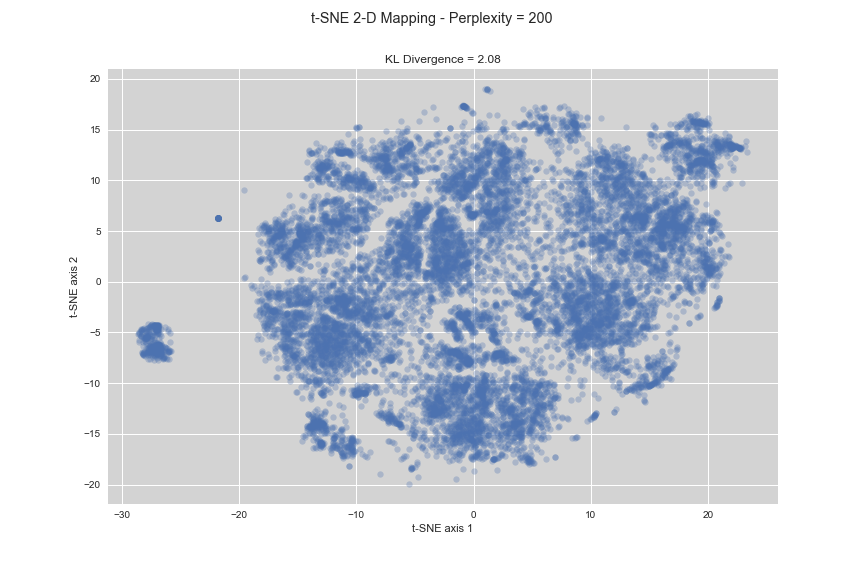

In [85]:
Image("../cluster/t-sne_perplx_plots/perplex_0200.png")

* ### Clustering  

Having completed the t-SNE mapping, the next step in the process was to apply different clustering methods for evaluation of appropriate clustering results.

In our evaluation, we chose to evaluate with  

* #### k-means clustering  
* #### spectral clustering  
* #### hierarchical clustering   
    
These three methods have fundamental differences and we assessed that they can provide different opportunities on this data set to provide opportunities to provide at least some success.  

#### K-Means Clustering  (Training)
     
    - the process for implementing the k-means was as follows :  
        - read into memory the full data set  
        - read into memory the stored t-SNE vectors along with the reference indices 
        - initiate the k-means clustering from the sci-kit learn library  
        - the initialization method chosen is 'kmeans++' as that can improve convergence time  
    - the number of clusters was evaluated for 2 - 20 clusters
    - the results presented here correspond to the t-SNE 2-D vectors associated to perplexity value of 100
    

#### SpectralClustering  (Training)
     
    - the process for implementing the spectralclustering is similar to the process as was used for k-means :  
        - read into memory the full data set  
        - read into memory the stored t-SNE vectors along with the reference indices  
        - initiate the spectralclustering from the sci-kit learn library  
            - the affinity method chosen is 'nearest_neighbors' 
            --> is there a preference for n_n vs other methods ?????
    - the number of clusters was evaluated for 2 - 20 clusters
    - the results presented here correspond to the same t-SNE 2-D vectors associated to perplexity value of 100 as was used for the k-means clustering. This provides an opportunity to do a basic comparison of the different cluster methods on the same data set with identical dimensional reduction.

#### K-Means Clustering  (Evaluation)

    - the results of the clustering were evaluated using the _silhouette_ and _inertia_ scores
    - the _silhouette_ score provides a measure of the cohesion of the observations within their assigned cluster relative to their separation from the observations in the neighboring clusters. The higher the silhouette value (to a maximum value of 1) represents a more preferred clustering.  For this evaluation, we plotted the average silhouette score for each _K_ value for the range of clusters. From the plot below, the silhouette score indicates that a clustering of 12 or 13 provides the highest silhouette score, and also a local maximum is observed at 7 clusters.  
    - the _inertia_ score provides the sum of squared distances of each value to its assigned cluster centroid. A lower _inertia_ score indicates lower variance within the set of clusters. As this is a continaully decreasing function relative to the number of clusters, typical practice is to identify an 'elbow' in the _inertia_ vs. number of clusters plot as an indicator of optimal number of clusters. That method is used here to identify that approximately 7 - 14 clusters can be considered the range of appropriate number of clusters.  

- Thus, by standard measures, appropriate choices for number of clusters from this k-means clustering analysis is 12 or 13, and also it is reasonable to evaluate the clusters with k = 7.  

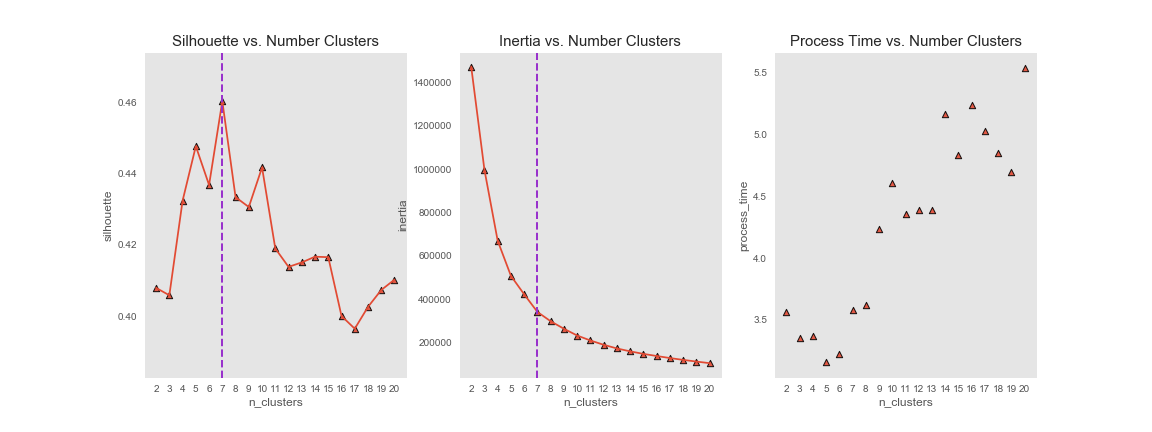

In [86]:
Image("../cluster/cluster_kmeans_number_of_clusters_eval.png")

#### Spectral Clustering  (Evaluation)

    - the results of the clustering were evaluated using the _silhouette_ scores
    - as stated above, the _silhouette_ score provides a measure of the cohesion of the observations within their assigned cluster relative to their separation from the observations in the neighboring clusters. The higher the silhouette value (to a maximum value of 1) represents a more preferred clustering.  For this evaluation, we plotted the average silhouette score for each _K_ value for the range of clusters. From the plot below, the silhouette score indicates that a clustering of 12 or 13 provides the highest silhouette score, and also a local maximum is observed at 7 clusters.  

- Thus, by _silhouette_ score, appropriate choices for number of clusters from this spectral clustering analysis is 7 to 10 clusters; we will evaluate theanalysis with 7 clusters as that provides the simpler cluster set without loss of any practical significance in the _silhouette_ score.

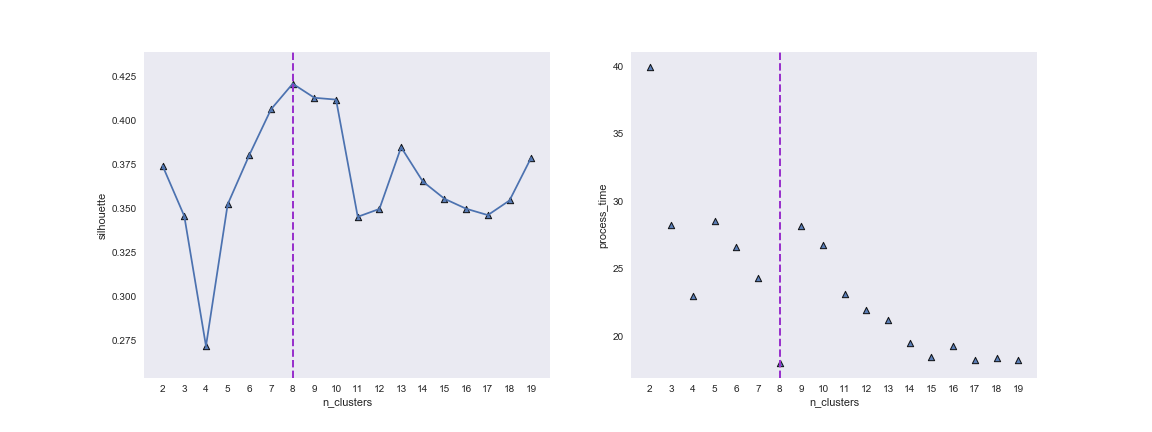

In [87]:
Image("../cluster/cluster_spctrl_number_of_clusters_eval.png")

### K-Means Clusters - Visualize  

* To evaluate the resulting clusters for each of the above candidate values of k (7, 12, 13), the following approach is taken :  

    - re-join the feature data set to the cluster identification regions from the k-means analysis for comparison of the features with the mapped cluster labels  
    - construct visual interpretation aid of a 3-plot set for each feature as shown in below figures. Each 3-set of plots includes the following :  
        - left hand map is a spectrum map of that feature onto the t-SNE 2-D vector space, the color scale represents the magnitude of each point of the feature in that space,
        - the center plot is a set of box-whisker plots of the same feature, where each boxplot is associtaed to each of the cluster labels. In addition to the boxplots which include the quartile definitions as the box boundaries, the population mean in each cluster is represented on the boxplot chart in (small) white text.
        - the right hand map is the representation of the cluster labels - differentiatied by each color region - of the clusters as visualized in the t-SNE 2D space
        
   - the 3-plot set can be viewed together for each feature to understand how that feature's relative values are distributed across the clusters, and allows to visualize 
   - examples from 4 of the features (LDA_00, LDA_01, LDA_02, LDA_03, and LDA_04) are shown in the following set of plots (Figures XX --> XX_5)  
   
* These plots show the following relationships :  
    - LDA_00 high values are assocoate ...
    - LDA_01 high values are assocoate ...
    - LDA_02 high values are assocoate ...
    - LDA_03 high values are assocoate ...
    - LDA_04 high values are assocoate ...
* Similarly, an observation about relative participation of each feature in each of the clusters was identified and used in the subsequent interpretations of the clusters.
   

### Fig X - ln_LDA_00 distributions in K-Means 15-cluster space  

* Clusters 0 & 6 are associated to high values of LDA_00 (correlated to Business Channel)

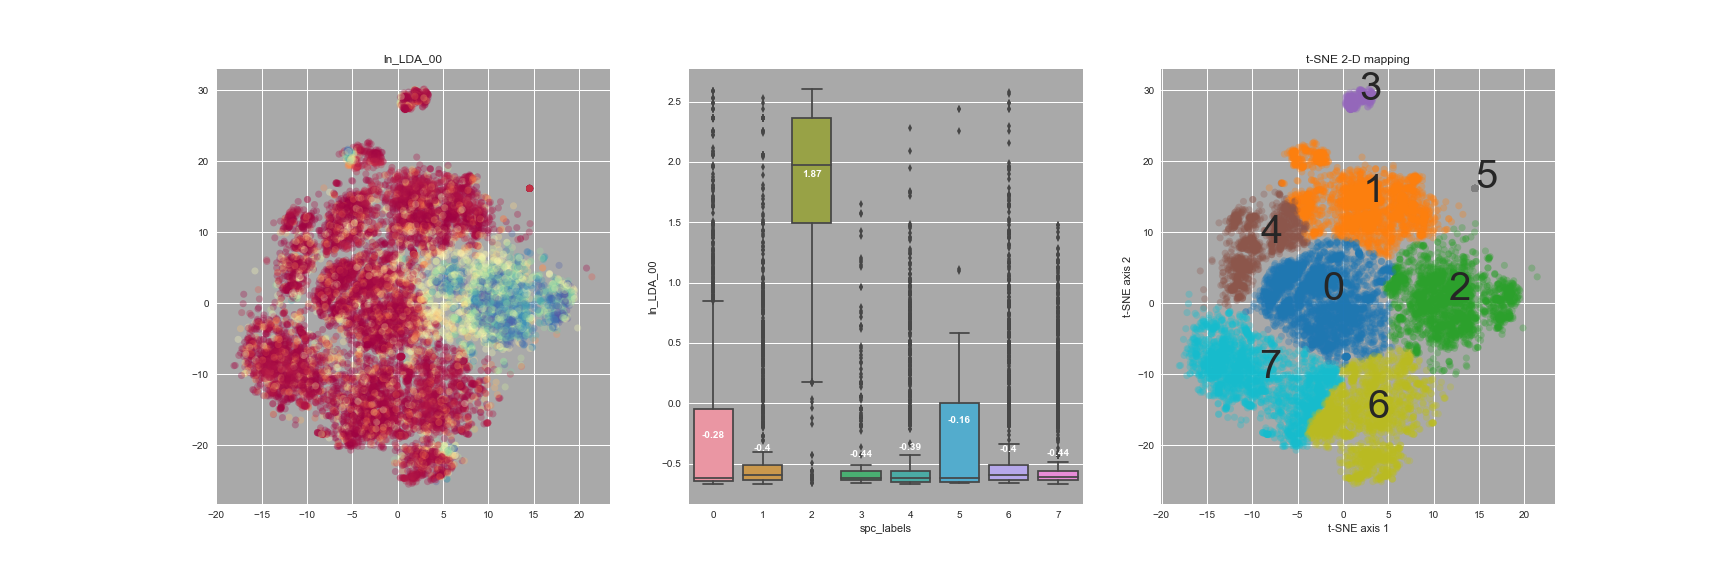

In [88]:
Image("../cluster/cluster_spctrl_3way_preplx_100_ln_LDA_00.png")

### Fig X - ln_LDA_01 distributions in K-Means 15-cluster space  

* Cluster 10 - associated to high values of LDA_01 (correlated to Entertainment Channel)

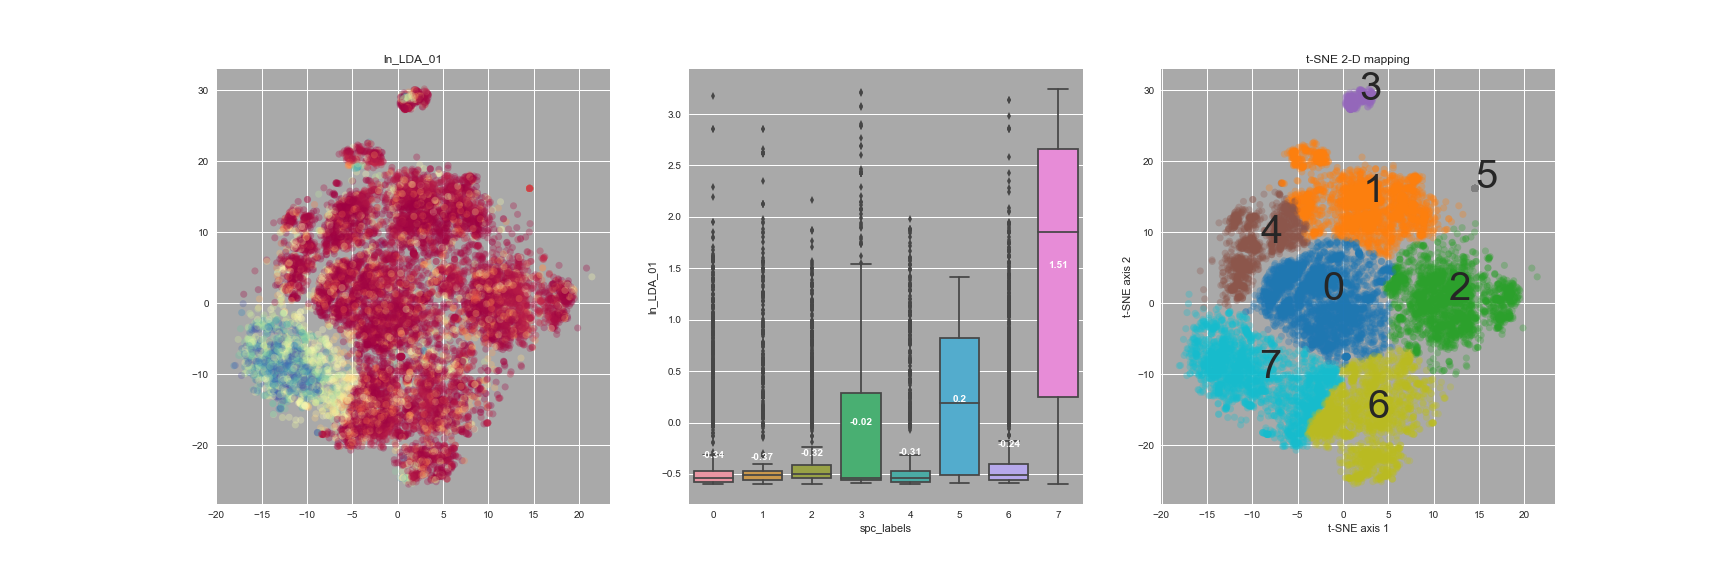

In [89]:
Image("../cluster/cluster_spctrl_3way_preplx_100_ln_LDA_01.png")

### Fig X - ln_LDA_02 distributions in K-Means 15-cluster space  

* Cluster 4 - associated to high values of LDA_02 (correlated to World Channel)

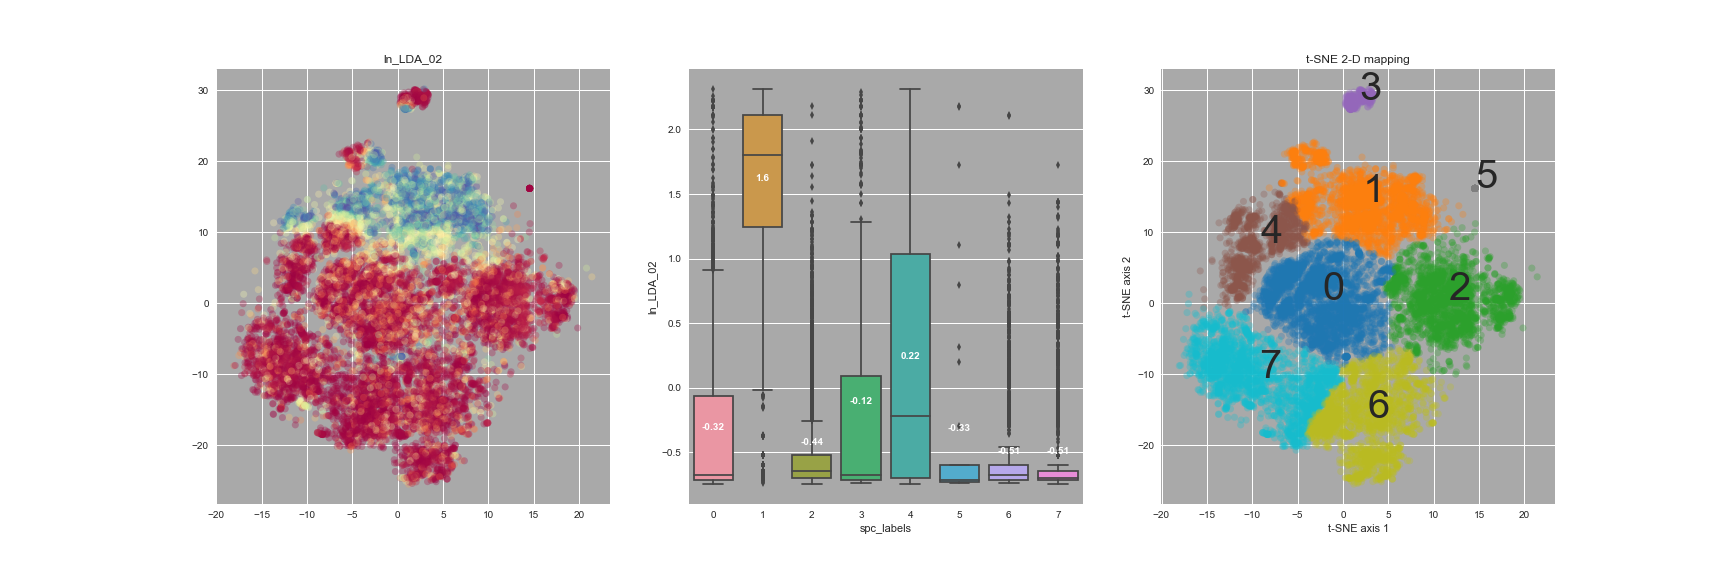

In [90]:
Image("../cluster/cluster_spctrl_3way_preplx_100_ln_LDA_02.png")

### Fig X - ln_LDA_03 distributions in K-Means 15-cluster space  

* Cluster 1 & 3 - associated to high values of LDA_03

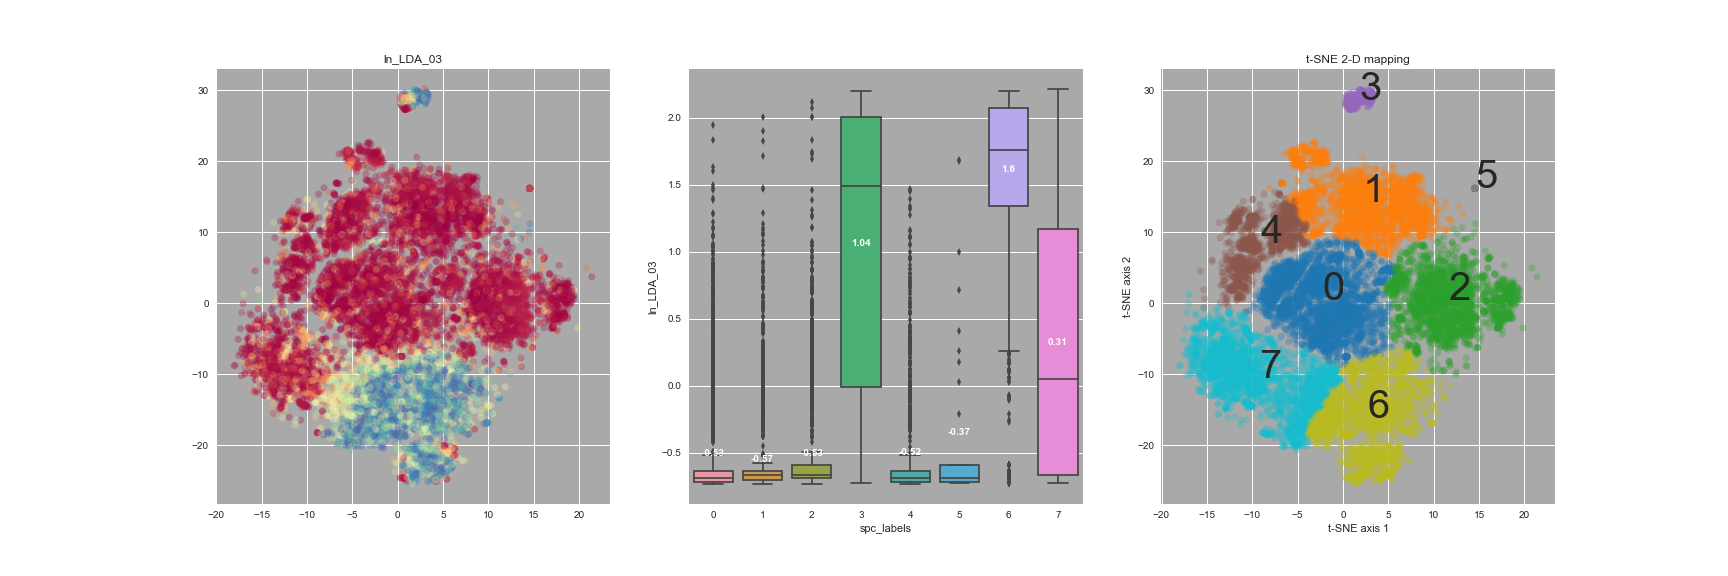

In [91]:
Image("../cluster/cluster_spctrl_3way_preplx_100_ln_LDA_03.png")

### Fig X - ln_LDA_04 distributions in K-Means 15-cluster space  

* Clusters 2 & 9 - associated to high values of LDA_04 (correlated to Technology Channel)

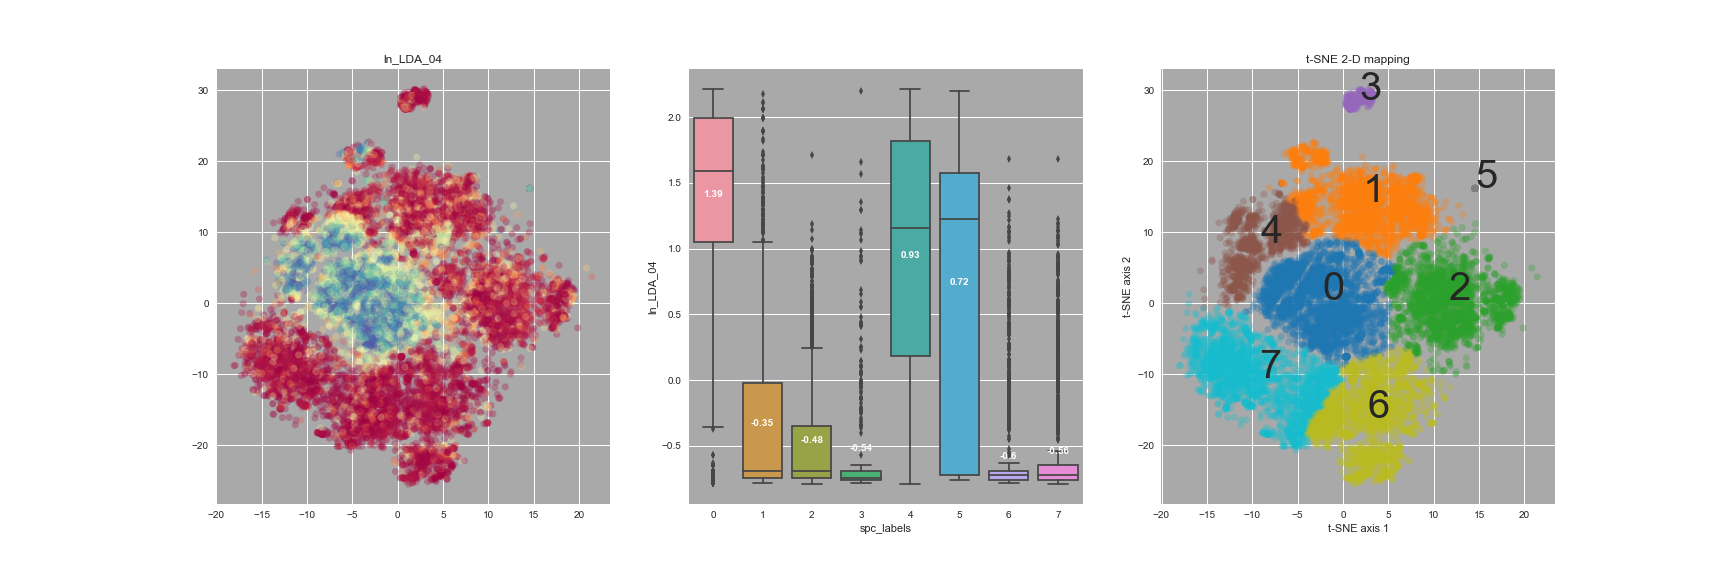

In [92]:
Image("../cluster/cluster_spctrl_3way_preplx_100_ln_LDA_04.png")

- The 3-plot sets above aid in identifying the assocation of each feature relative to the cluster regions and 

To further understand the cluster relationships, an additional view is presented. For each cluster the mean value of each feature in that cluster was determined, the standard deviation of those means, and a z-score of each mean relative to other means in that cluster were compared. The goal was not to assess these z-scores for statistical signficantly different means, but rather as a method to identify in a consistent way the relative participation of each feature in each cluster. The goal is to identify the few most (both positively and negatively) impactful features in defining the cluster characteristics. The median of each cluster, or some other statistic, could have also been used for this purpose. For the clusters developed for this data set, means and medians provide essentially the same view of the major contributors to a cluster characterization.

The plots below show these distributions of means for each feature in each of the clusters developed from the above k-means application.

As an example, we can make the following observations of the clusters based on these plots (and a detailed examination of the underlying values in a data table)  

* Cluster 01  
    - LDA_04 (correlated to Technology Channel) is strongest definer
    - several references to _positive_ sentiment rank near the top contributors
    - All other LDA scores are negatively indicated in this cluster - there is a strong negative relationship to the other data channels (Business, Entertainment, World, and SocialMedia). In other words, this cluster is uniquely associated to the Technoglogy channel and also has appreciation for article content with stronger positive sentiments
    
* Cluster 04
    - LDA_04 and LDA_02 are strong participants in this cluster
        . LDA_04 is correlated to the Technology Channel
        . LDA_02 is correlated to the World Channel
        . 
    - Measures related to referencing other articles from within the mashable ecosystem (ln_self_reference_sharess)vare minimally used
    - Measures related to high use of keywords from within these articles is negatively associated to this cluster (kw_min_max and kw_avg_max)
    Thus, we can interpret this to be a cluster defined by an intersection or association of appreciation to World and Technolgy related content and with low reliance and interest on pursuing to other (even related) articles within the mashable site
    
Similary, an interpretation was completed for each cluster based on the relative measure of feature means distribution within each cluster.

As will be shown in subsequent sections, this exercise was repeated for each of the clustering methods deployed. A synopsis of relevant clusters from the overall analysis will be presented in the summary section.



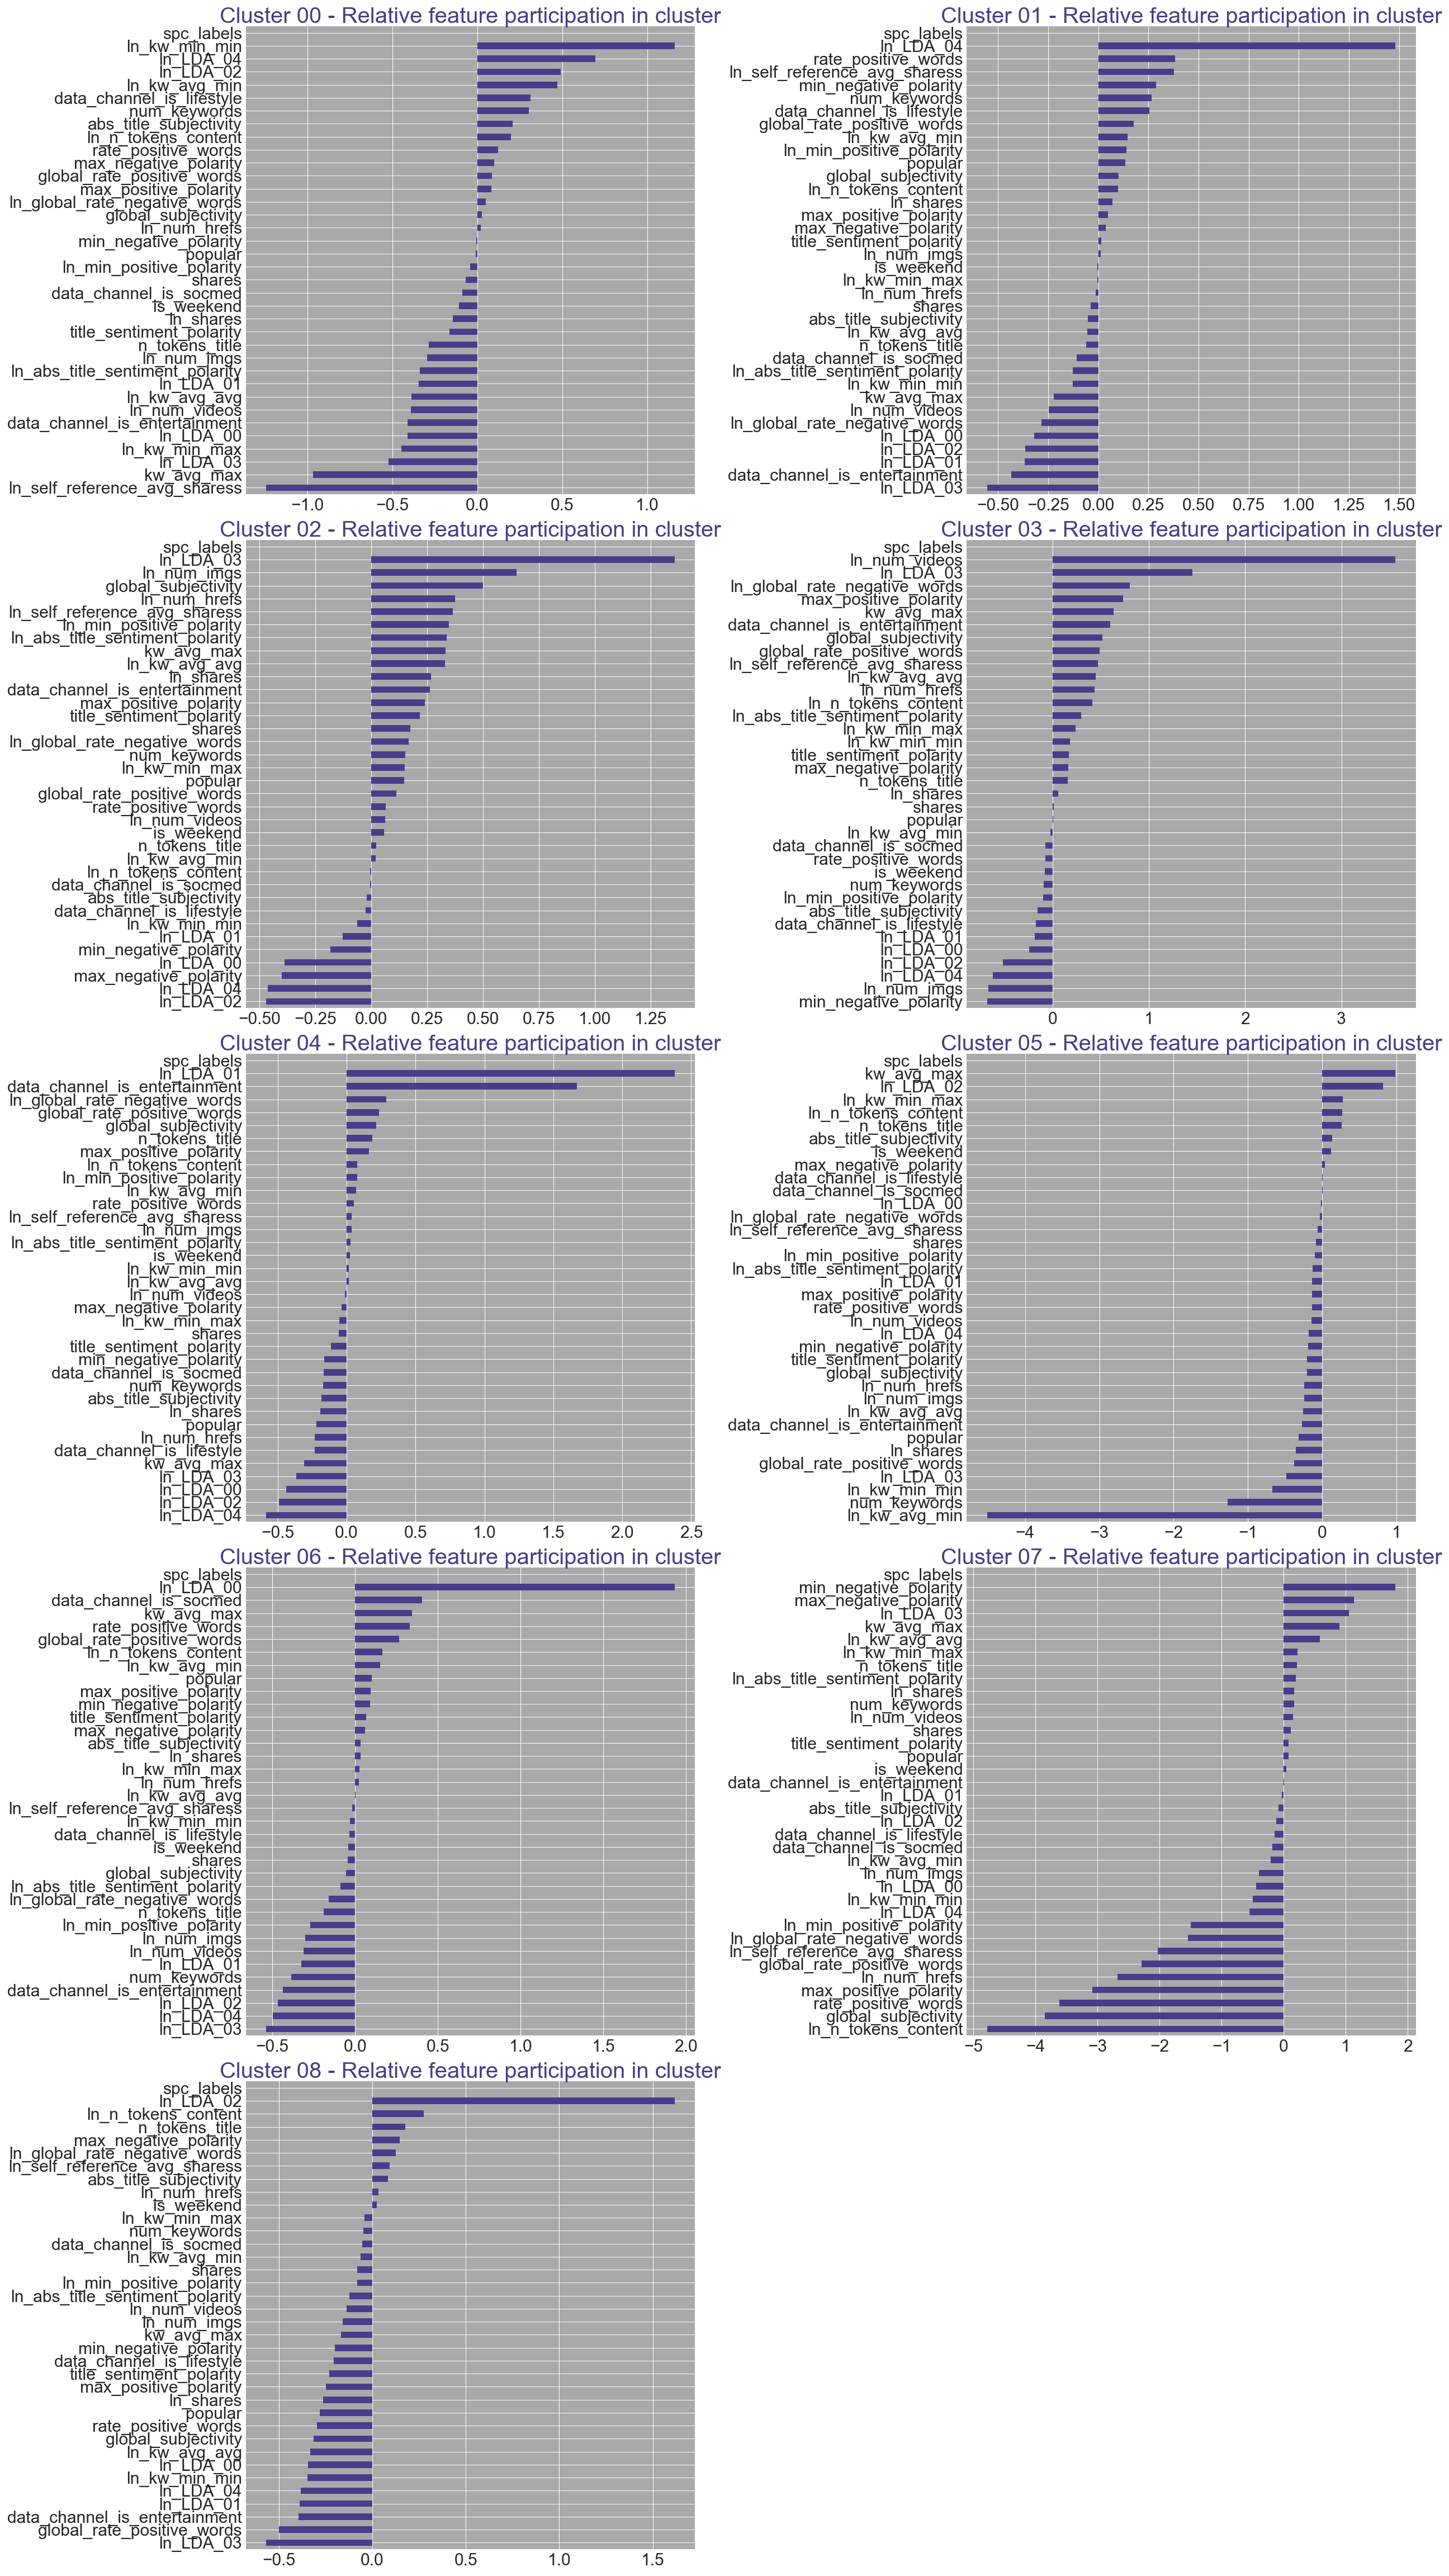

In [93]:
Image("../cluster/cluster_kmeans_cluster_barplots.png")

### SpectralClustering - Visualize  

* To evaluate the resulting 7 clusters from the spectral clustering, a similar approach is taken as was used above for the k-means evaulation :  

    - re-join the feature data set to the cluster identification regions from the spectral clustering analysis for comparison of the features with the mapped cluster labels  
    - construct visual interpretation aid of a 3-plot set for each feature as shown in below figures. Each 3-set of plots includes the following :  
        - left hand map is a spectrum map of that feature onto the t-SNE 2-D vector space, the color scale represents the magnitude of each point of the feature in that space,
        - the center plot is a set of box-whisker plots of the same feature, where each boxplot is associtaed to each of the cluster labels. In addition to the boxplots which include the quartile definitions as the box boundaries, the population mean in each cluster is represented on the boxplot chart in (small) white text.
        - the right hand map is the representation of the cluster labels - differentiatied by each color region - of the clusters as visualized in the t-SNE 2D space
        
   - the 3-plot set can be viewed together for each feature to understand how that feature's relative values are distributed across the clusters, and allows to visualize 
   - examples from 4 of the features (LDA_00, LDA_01, LDA_02, LDA_03, and LDA_04) are shown in the following set of plots (Figures XX --> XX_5)  
   
* These plots show the following relationships :  
    - LDA_00 high values are assocoate ...
    - LDA_01 high values are assocoate ...
    - LDA_02 high values are assocoate ...
    - LDA_03 high values are assocoate ...
    - LDA_04 high values are assocoate ...
* Similarly, an observation about relative participation of each feature in each of the clusters was identified and used in the subsequent interpretations of the clusters.
   

### Fig X - ln_LDA_04 distributions in K-Means 15-cluster space  

* Clusters 2 & 9 - associated to high values of LDA_04 (correlated to Technology Channel)

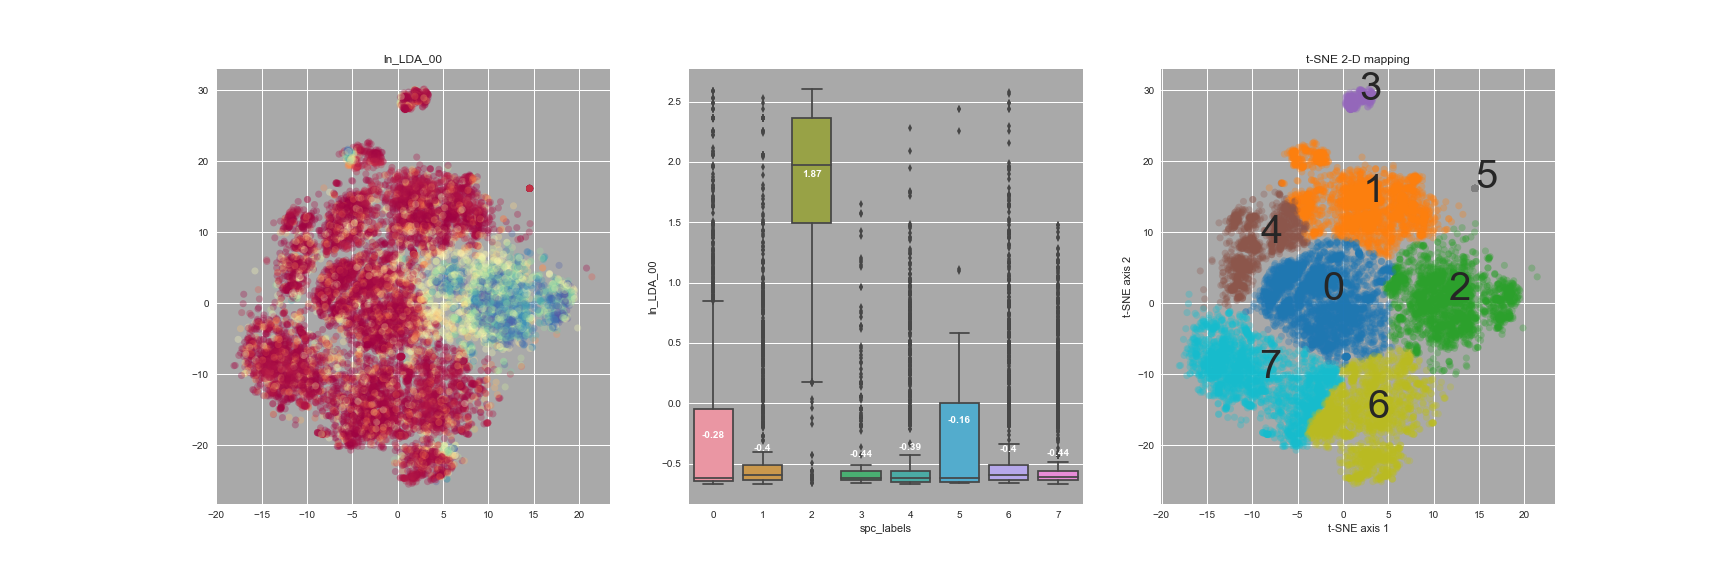

In [94]:
Image("../cluster/cluster_spctrl_3way_preplx_100_ln_LDA_00.png")

### Fig X - ln_LDA_04 distributions in K-Means 15-cluster space  

* Clusters 2 & 9 - associated to high values of LDA_04 (correlated to Technology Channel)

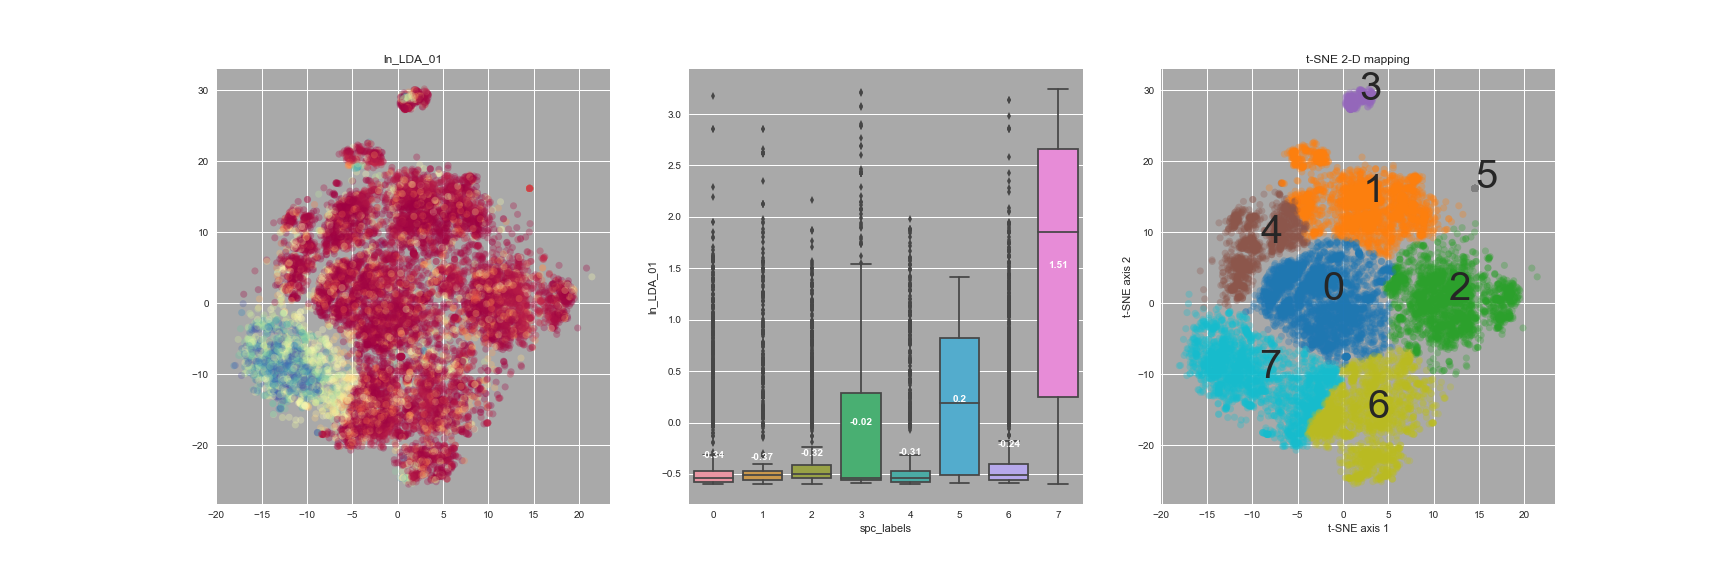

In [95]:
Image("../cluster/cluster_spctrl_3way_preplx_100_ln_LDA_01.png")

### Fig X - ln_LDA_04 distributions in K-Means 15-cluster space  

* Clusters 2 & 9 - associated to high values of LDA_04 (correlated to Technology Channel)

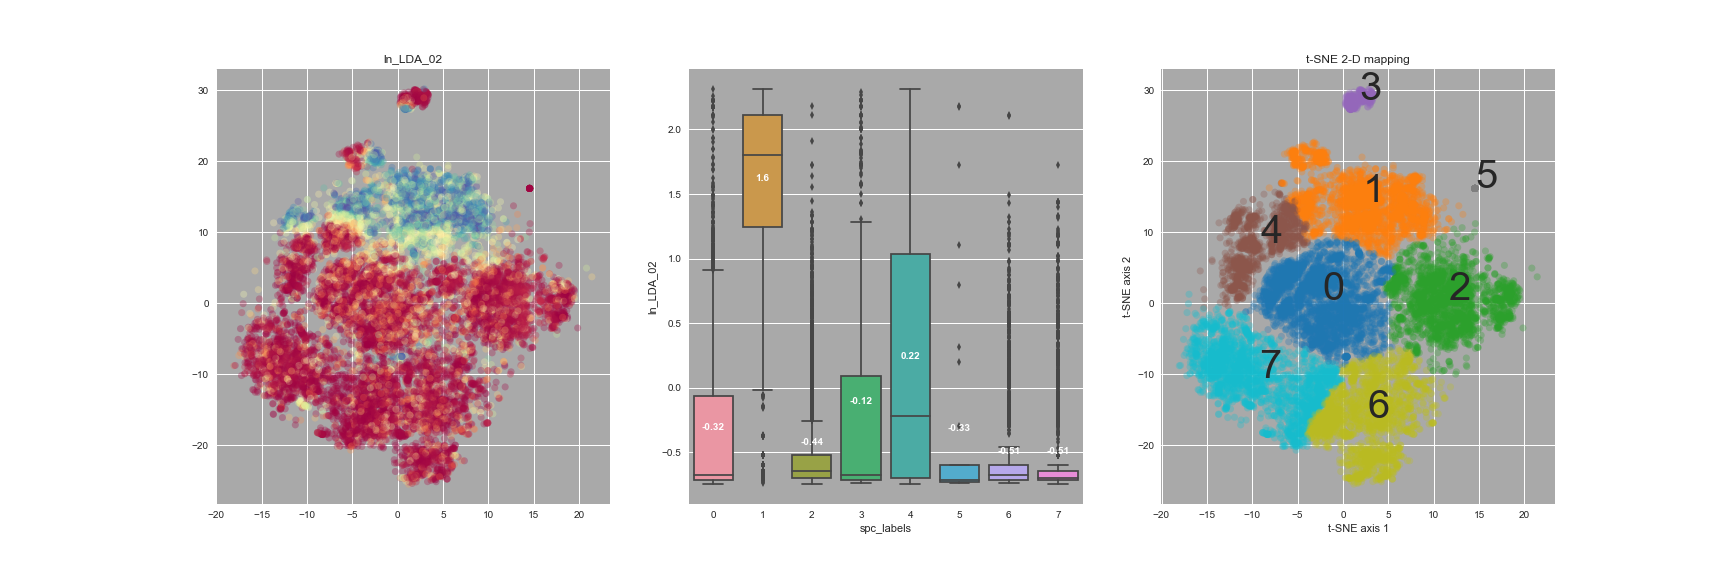

In [96]:
Image("../cluster/cluster_spctrl_3way_preplx_100_ln_LDA_02.png")

### Fig X - ln_LDA_04 distributions in K-Means 15-cluster space  

* Clusters 2 & 9 - associated to high values of LDA_04 (correlated to Technology Channel)

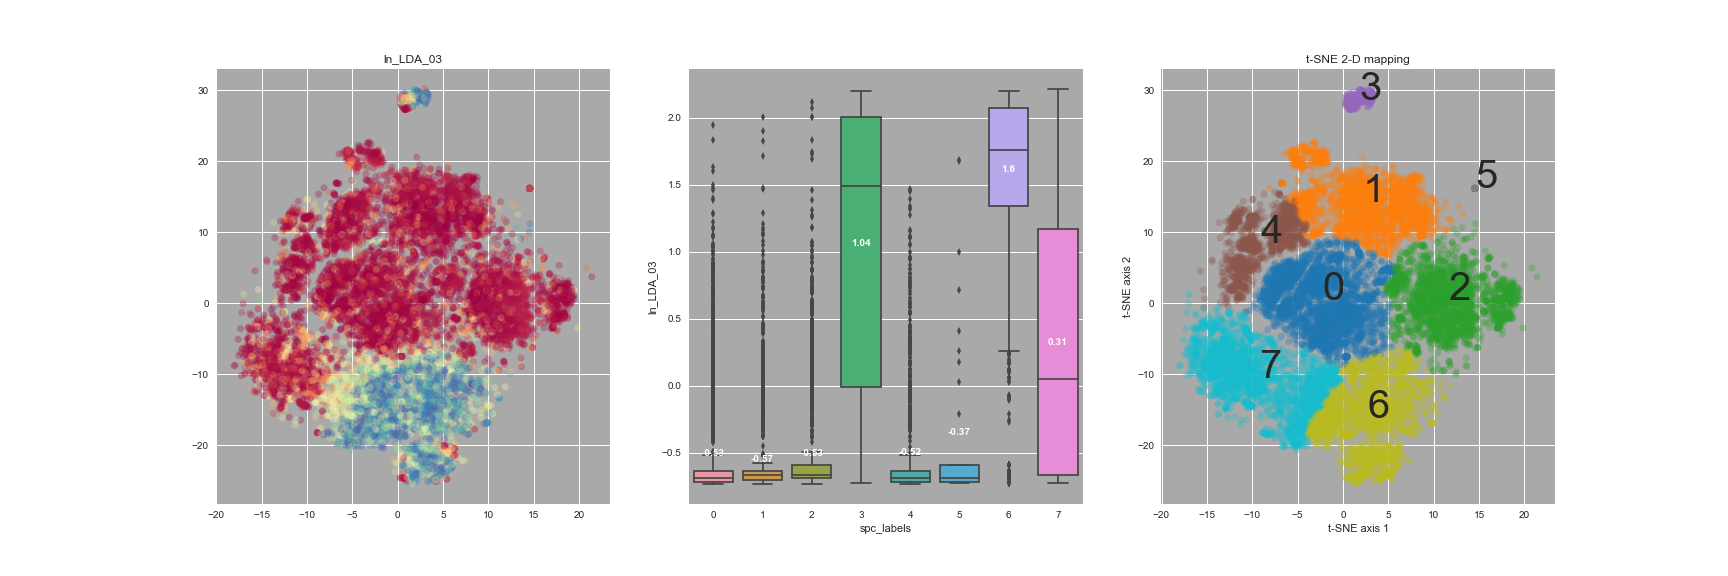

In [97]:
Image("../cluster/cluster_spctrl_3way_preplx_100_ln_LDA_03.png")

### Fig X - ln_LDA_04 distributions in K-Means 15-cluster space  

* Clusters 2 & 9 - associated to high values of LDA_04 (correlated to Technology Channel)

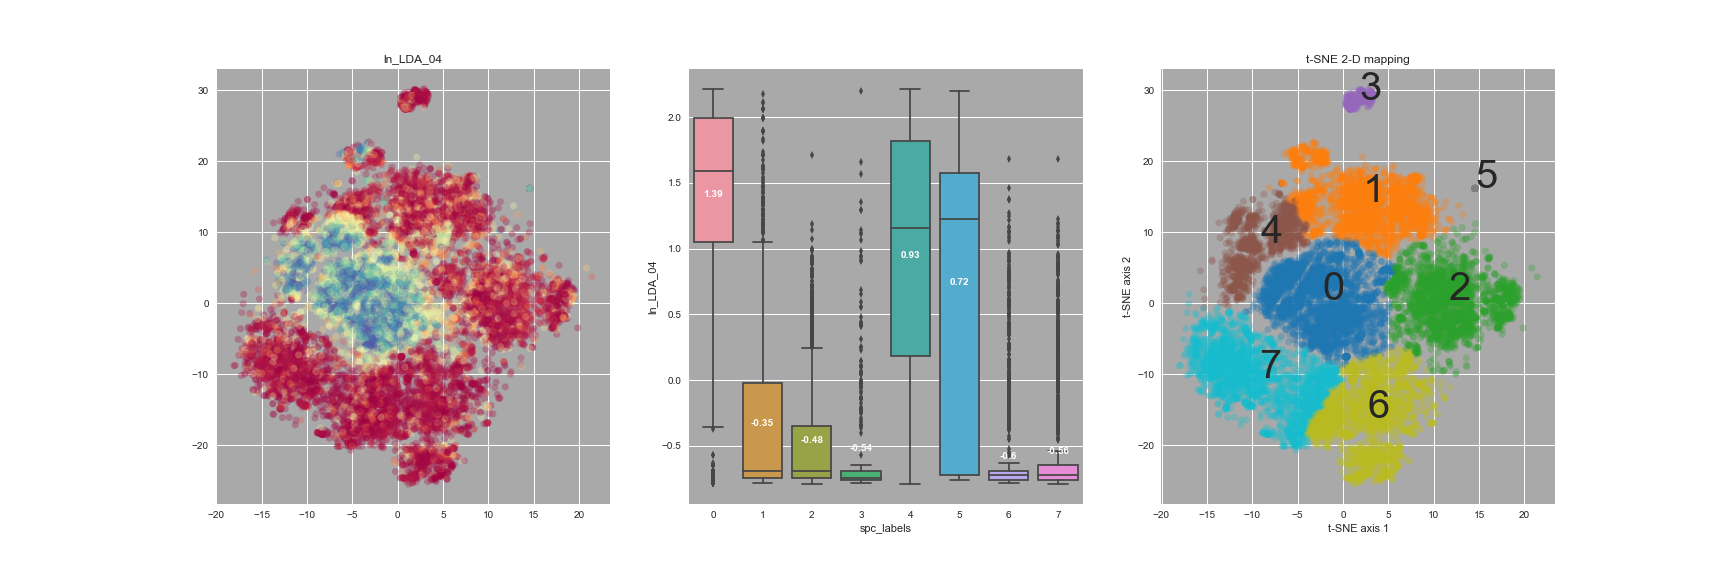

In [98]:
Image("../cluster/cluster_spctrl_3way_preplx_100_ln_LDA_04.png")

- The 3-plot sets above aid in identifying the assocation of each feature relative to the cluster regions and 

To further understand the cluster relationships, an additional view is presented. For each cluster the mean value of each feature in that cluster was determined, the standard deviation of those means, and a z-score of each mean relative to other means in that cluster were compared. The goal was not to assess these z-scores for statistical signficantly different means, but rather as a method to identify in a consistent way the relative participation of each feature in each cluster. The goal is to identify the few most (both positively and negatively) impactful features in defining the cluster characteristics. The median of each cluster, or some other statistic, could have also been used for this purpose. For the clusters developed for this data set, means and medians provide essentially the same view of the major contributors to a cluster characterization.

The plots below show these distributions of means for each feature in each of the clusters developed from the above k-means application.

As an example, we can make the following observations of the clusters based on these plots (and a detailed examination of the underlying values in a data table)  

* Cluster 01  
    - LDA_04 (correlated to Technology Channel) is strongest definer
    - several references to _positive_ sentiment rank near the top contributors
    - All other LDA scores are negatively indicated in this cluster - there is a strong negative relationship to the other data channels (Business, Entertainment, World, and SocialMedia). In other words, this cluster is uniquely associated to the Technoglogy channel and also has appreciation for article content with stronger positive sentiments
    
* Cluster 04
    - LDA_04 and LDA_02 are strong participants in this cluster
        . LDA_04 is correlated to the Technology Channel
        . LDA_02 is correlated to the World Channel
        . 
    - Measures related to referencing other articles from within the mashable ecosystem (ln_self_reference_sharess)vare minimally used
    - Measures related to high use of keywords from within these articles is negatively associated to this cluster (kw_min_max and kw_avg_max)
    Thus, we can interpret this to be a cluster defined by an intersection or association of appreciation to World and Technolgy related content and with low reliance and interest on pursuing to other (even related) articles within the mashable site
    
Similary, an interpretation was completed for each cluster based on the relative measure of feature means distribution within each cluster.

As will be shown in subsequent sections, this exercise was repeated for each of the clustering methods deployed. A synopsis of relevant clusters from the overall analysis will be presented in the summary section.



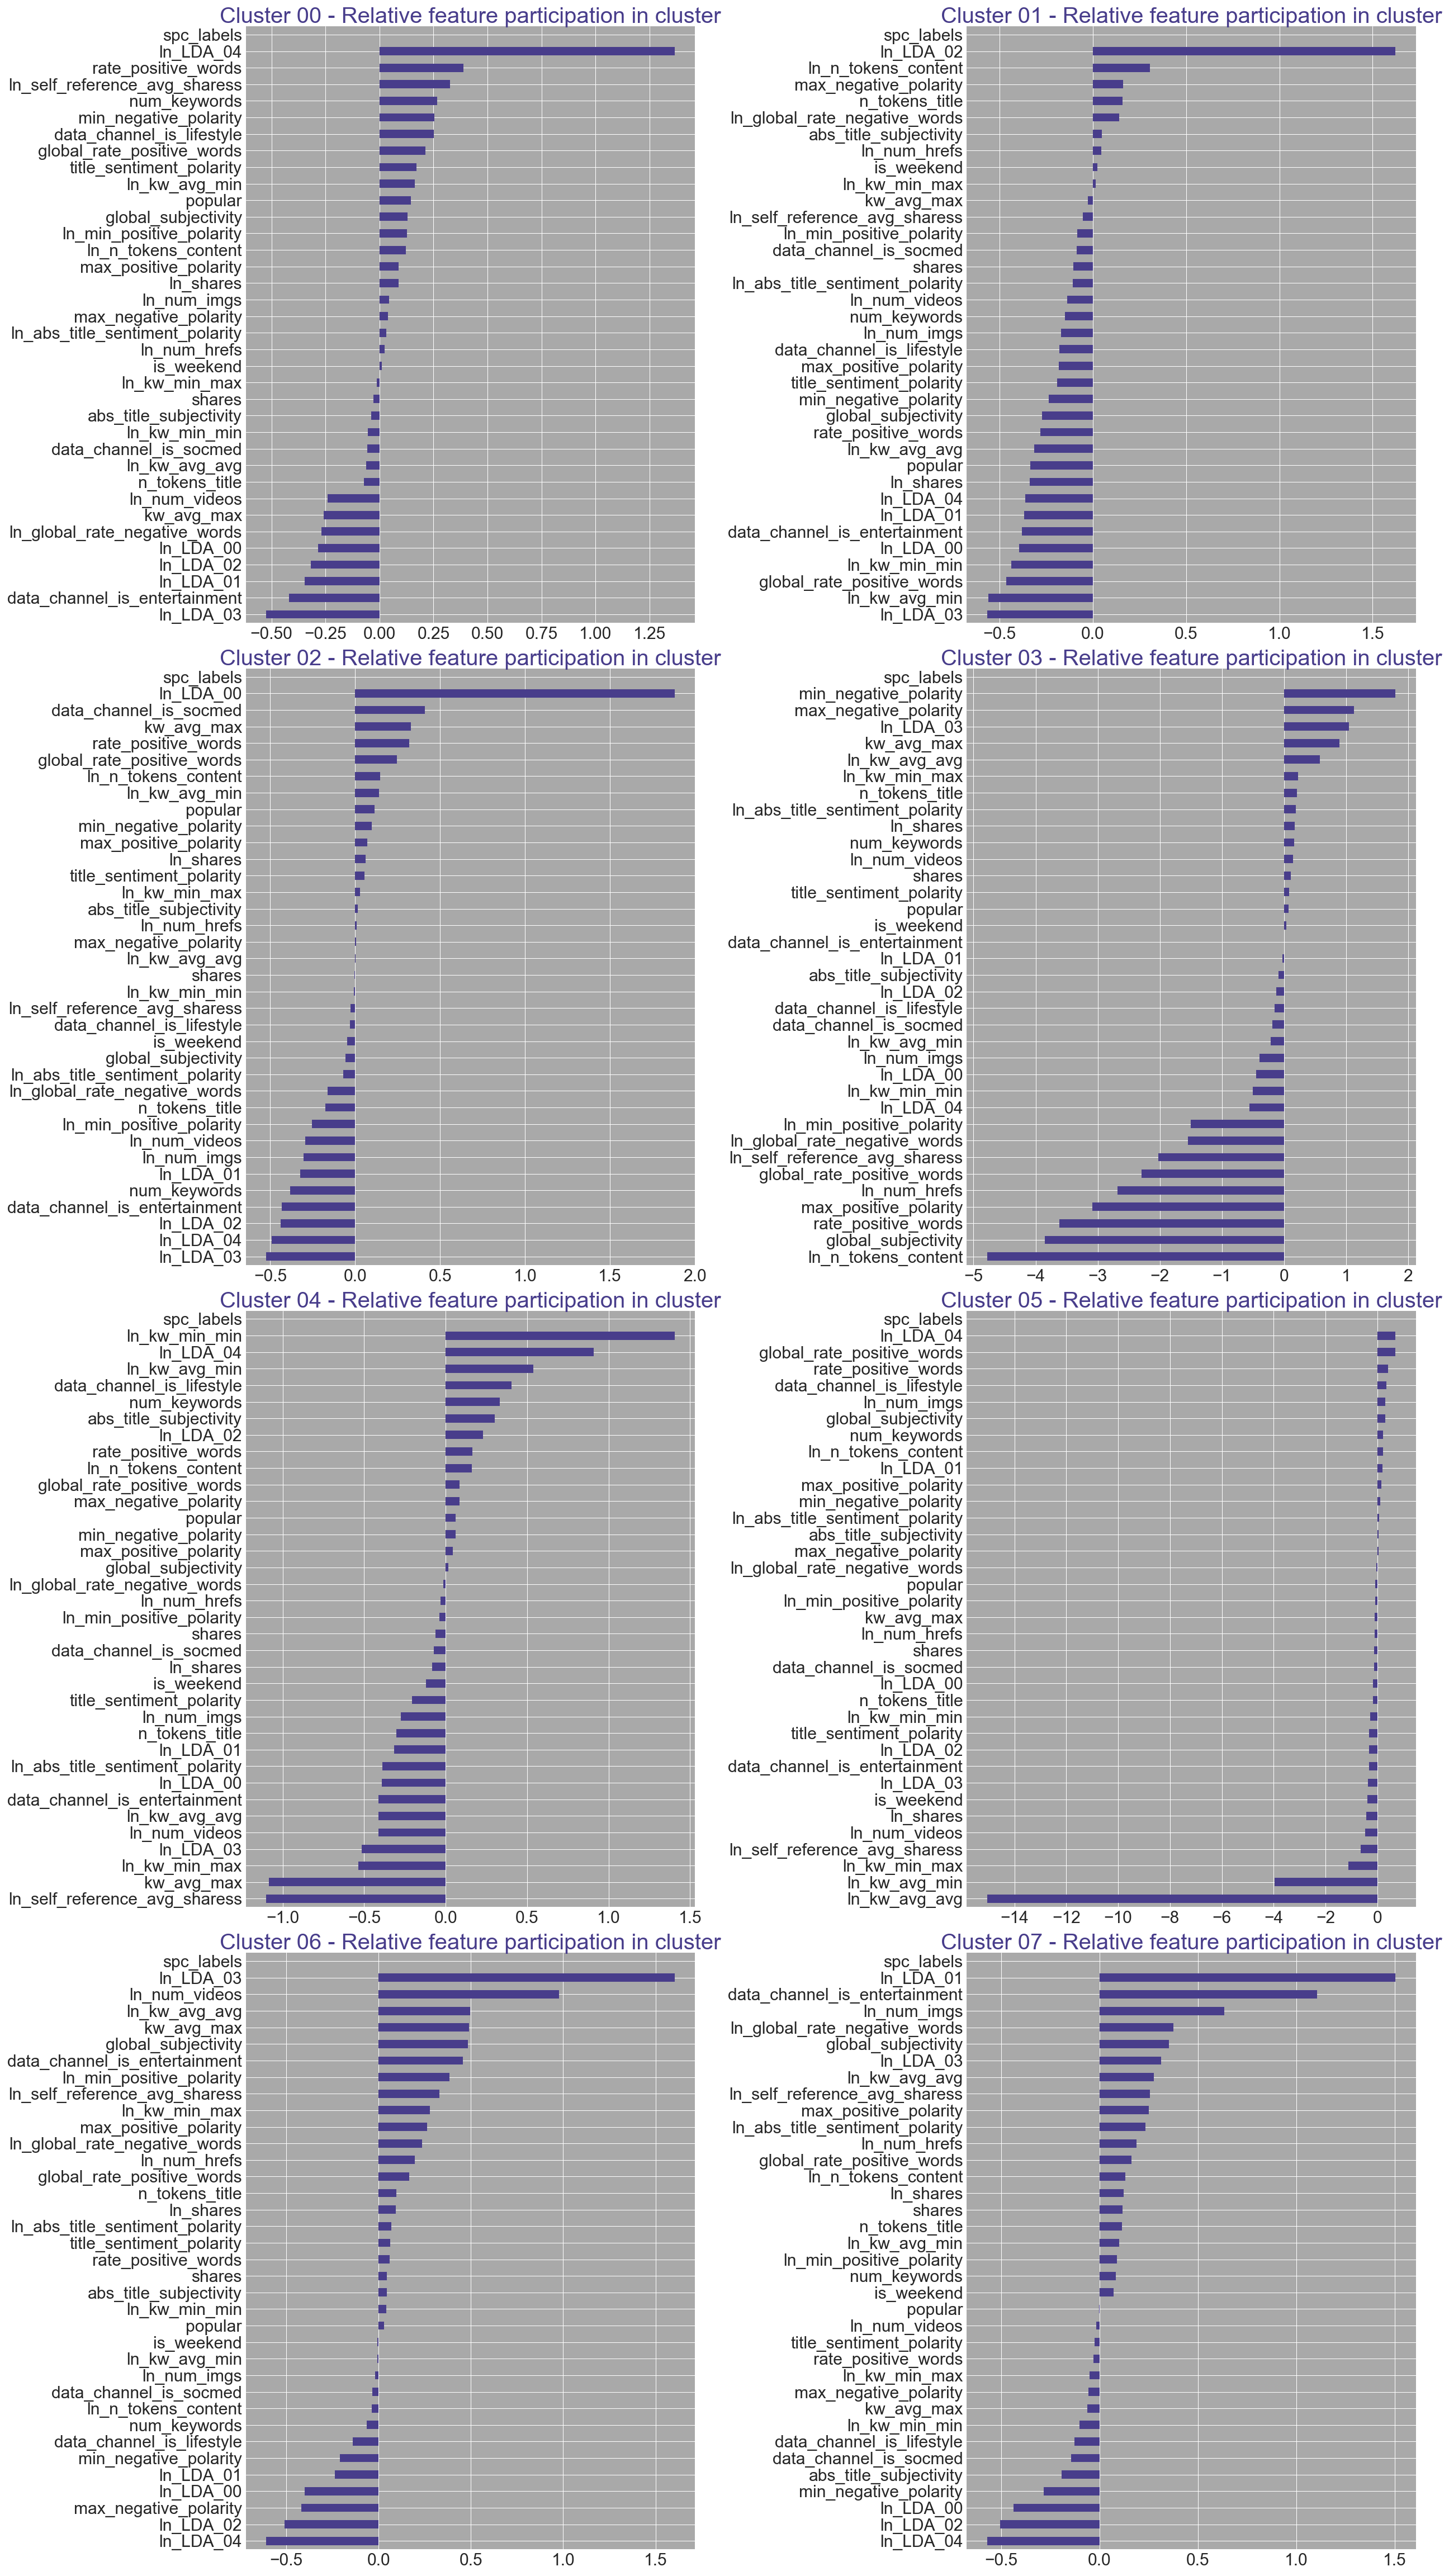

In [99]:
Image("../cluster/cluster_spctrl_cluster_barplots_horizontal.png")

<a name='ref.01'></a>  
<a href='#toc'>Return to Table of Contents</a>  

### References

1. <a name='fn1'></a> https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/  
2. <a name='fn2'></a> https://lvdmaaten.github.io/tsne/  